In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = yf.download('BTC-USD','2015-01-01','2024-10-30')

[*********************100%***********************]  1 of 1 completed


In [5]:
data = pd.DataFrame(data)

In [6]:
data.reset_index(inplace=True)

In [7]:
data.drop(columns = ['Date','Open','High','Low','Adj Close','Volume'], inplace=True)

<ipython-input-7-47e2c4241fa1>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data.drop(columns = ['Date','Open','High','Low','Adj Close','Volume'], inplace=True)


In [8]:
data

Price,Close
Ticker,BTC-USD
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
3585,66642.414062
3586,67014.695312
3587,67929.296875


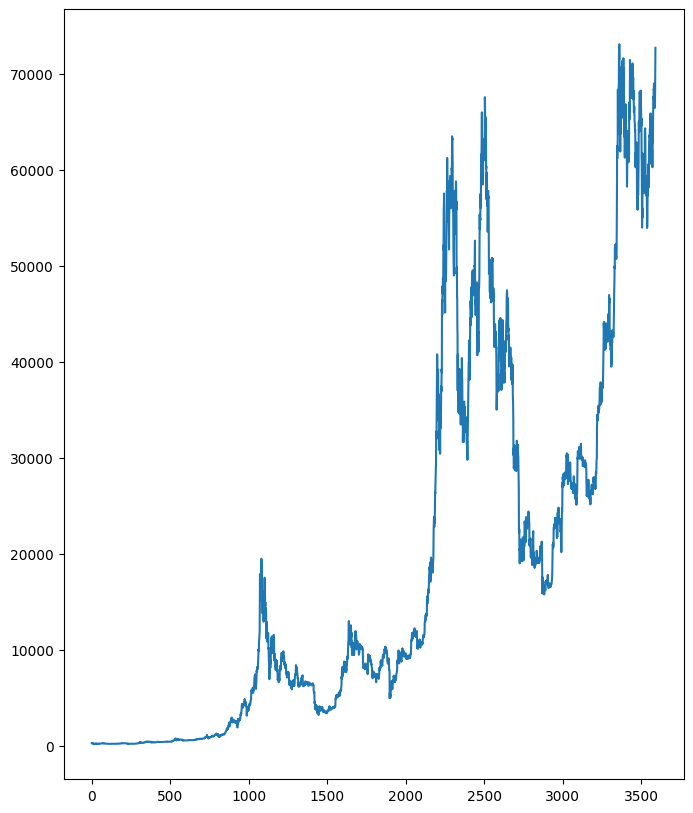

In [9]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show()

In [10]:
train_data = data[:-100]
test_data = data[-100:]

In [11]:
train_data.shape

(3490, 1)

In [12]:
test_data.shape

(100, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
train_data_scale = scaler.fit_transform(train_data)

In [15]:
base_days = 100

In [16]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [17]:
x, y = np.array(x), np.array(y)

In [18]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [19]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [23]:
model.fit(x, y, epochs = 50, verbose =1 )

Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 38s 294ms/step - loss: 0.0430
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 31s 291ms/step - loss: 0.0064
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - loss: 0.0049
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - loss: 0.0051
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - loss: 0.0051
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 41s 293ms/step - loss: 0.0043
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - loss: 0.0038
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 41s 300ms/step - loss: 0.0037
Epoch 9/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 41s 300ms/step - loss: 0.0037
Epoch 10/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - loss: 0.0035
Epoch 11/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 34s 323ms/step - loss: 0.0040
Epoch 12/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 38s 296ms/step - loss: 0.0037
Epoch 13/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - loss: 0.0034
Epoch 14/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - loss: 0.0031
Epoch 15/50
106

In [24]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [25]:
test_data

Price,Close
Ticker,BTC-USD
0,63821.472656
1,65738.726562
2,63426.210938
3,63811.863281
4,61276.691406
...,...
195,66642.414062
196,67014.695312
197,67929.296875


In [26]:
test_data_scale = scaler.transform(test_data)

In [27]:
x = []
y = []

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [28]:
x, y = np.array(x), np.array(y)

In [29]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [30]:
pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step


In [31]:
pred = scaler.inverse_transform(pred)

In [32]:
pred

array([[63401.062],
       [63861.777],
       [63988.383],
       [63799.445],
       [63512.06 ],
       [63508.55 ],
       [63771.684],
       [64189.88 ],
       [64456.57 ],
       [64464.277],
       [64137.36 ],
       [63720.523],
       [62978.29 ],
       [61999.9  ],
       [60768.33 ],
       [59130.613],
       [57533.625],
       [56236.59 ],
       [56021.902],
       [56746.36 ],
       [57882.344],
       [58690.727],
       [59022.48 ],
       [59142.484],
       [58971.375],
       [58484.105],
       [58001.02 ],
       [57749.09 ],
       [57625.94 ],
       [57673.105],
       [57783.57 ],
       [58119.63 ],
       [58517.184],
       [59238.266],
       [60146.324],
       [61006.973],
       [61474.367],
       [61194.805],
       [60363.754],
       [59399.94 ],
       [58591.414],
       [58063.145],
       [57629.668],
       [57460.39 ],
       [57341.45 ],
       [57266.88 ],
       [57018.727],
       [56378.363],
       [55521.18 ],
       [54760.605],


In [33]:
#future Bitcoin Price

In [34]:
m = y
z= []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━

In [35]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [36]:
z

array([[65570.3820366 ],
       [65815.23794147],
       [65479.59149903],
       [64811.03627932],
       [64054.64546224],
       [63352.53863479],
       [62753.36367273],
       [62254.03092533],
       [61832.50436065],
       [61465.53120661],
       [61134.22591895],
       [60824.91320827],
       [60528.10684742],
       [60237.601462  ],
       [59949.69903124],
       [59662.59182705],
       [59375.80618987],
       [59089.77232424],
       [58805.29849322],
       [58523.37112537],
       [58244.83759324],
       [57970.37579489],
       [57700.42897134],
       [57435.04057759],
       [57174.08024864],
       [56917.21772646],
       [56664.02280653],
       [56413.99141081],
       [56166.57600627],
       [55921.25078736]])

In [37]:
model.save('Bitcoin_Price_prediction_Model.keras')

In [38]:
from google.colab import files
files.download('Bitcoin_Price_prediction_Model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>